# Mai Duc An - 20210008

### Import library

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

### Import data



In [29]:
# Load the CitiesExt data
cities_df = pd.read_csv('CitiesExt.csv')
players_df = pd.read_csv('PlayersExt.csv')

## CitiesExt.csv visualization

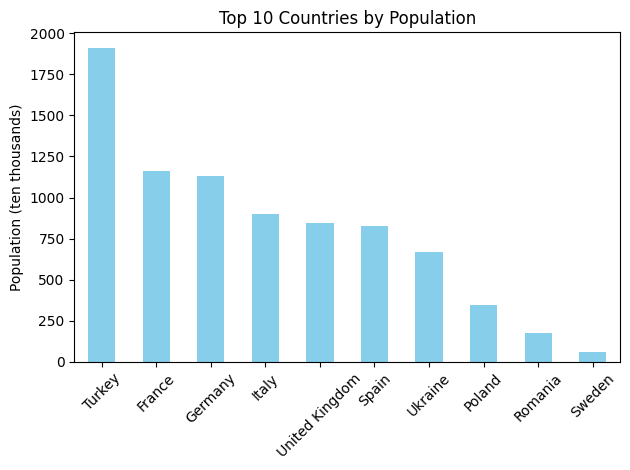

In [30]:
# Task 1: Bar chart of the ten countries with the highest population
top_10_pop = cities_df.groupby('country')['population'].sum().nlargest(10)
top_10_pop.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Population')
plt.ylabel('Population (ten thousands)')
plt.xticks(rotation=45)
plt.xlabel('')
plt.tight_layout()  # Adjusts layout so labels fit well
plt.show()

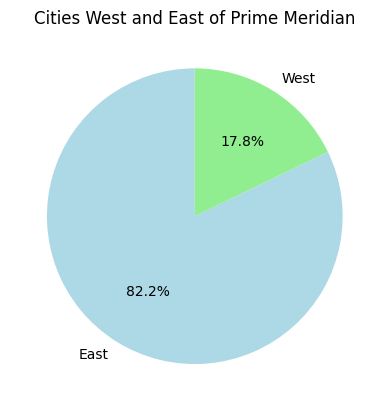

In [31]:
# Task 2: Pie chart of cities west and east of Prime Meridian
longitude_conditions = cities_df['longitude'] < 0
west_east_counts = ['West' if lon < 0 else 'East' for lon in cities_df['longitude']]
longitude_counts = pd.Series(west_east_counts).value_counts()
longitude_counts.plot(kind='pie', labels=longitude_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Cities West and East of Prime Meridian')
plt.ylabel('')
plt.show()

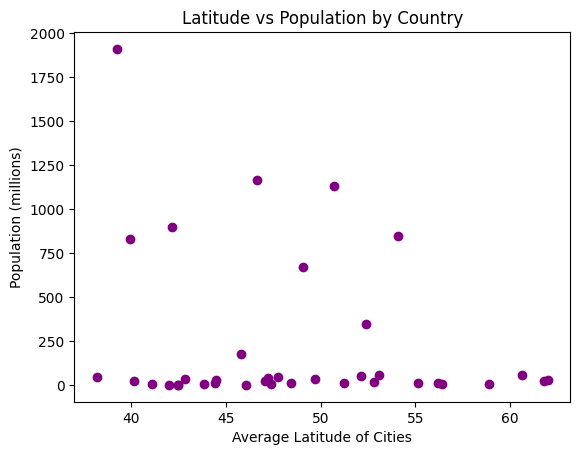

In [32]:
# Task 3: Scatter plot of latitude (x) vs population (y) for each country
latitude_population = cities_df.groupby('country').agg({'latitude': 'mean', 'population': 'sum'})
plt.scatter(latitude_population['latitude'], latitude_population['population'], color='purple')
plt.title('Latitude vs Population by Country')
plt.xlabel('Average Latitude of Cities')
plt.ylabel('Population (millions)')
plt.show()

## PlayersExt.csv visualization

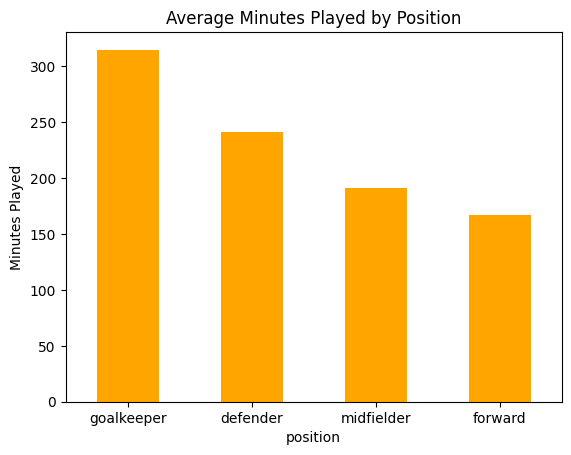

In [33]:
# Task 1: Bar chart showing the average number of minutes played by position
position_minutes = players_df.groupby('position')['minutes'].mean().nlargest()
position_minutes.plot(kind='bar', color='orange')
plt.title('Average Minutes Played by Position')
plt.ylabel('Minutes Played')
plt.xticks(rotation=0)
plt.show()

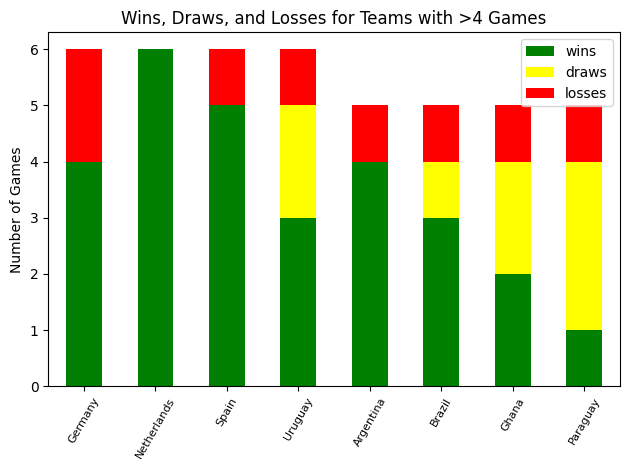

In [34]:
# Task 2: Stacked bar chart for teams that played more than 4 games
team_games = players_df.groupby('team').agg({'games': 'mean', 'wins': 'mean', 'draws': 'mean', 'losses': 'mean'})
teams_with_4_games = team_games[team_games['games'] > 4].sort_values(by='games', ascending=False)
teams_with_4_games[['wins', 'draws', 'losses']].plot(kind='bar', stacked=True, color=['green', 'yellow', 'red'])
plt.title('Wins, Draws, and Losses for Teams with >4 Games')
plt.ylabel('Number of Games')
plt.xticks(rotation=60, fontsize = 8)
plt.xlabel('')
plt.tight_layout()
plt.show()

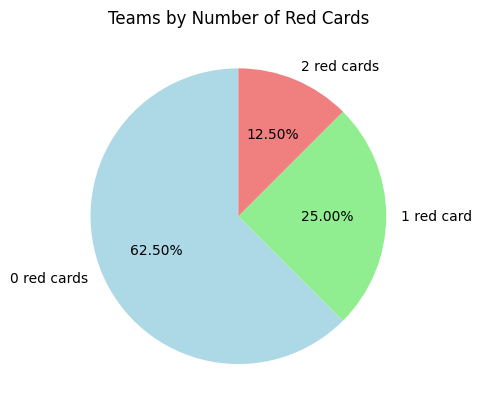

In [35]:
# Task 3: Pie chart showing relative percentage of teams with 0, 1, and 2 red cards
red_card_distribution = players_df.groupby('team')['redCards'].max().value_counts().reindex([0, 1, 2], fill_value=0)
red_card_distribution.plot(kind='pie', labels=['0 red cards', '1 red card', '2 red cards'], autopct='%1.2f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Teams by Number of Red Cards')
plt.ylabel('')
plt.show()

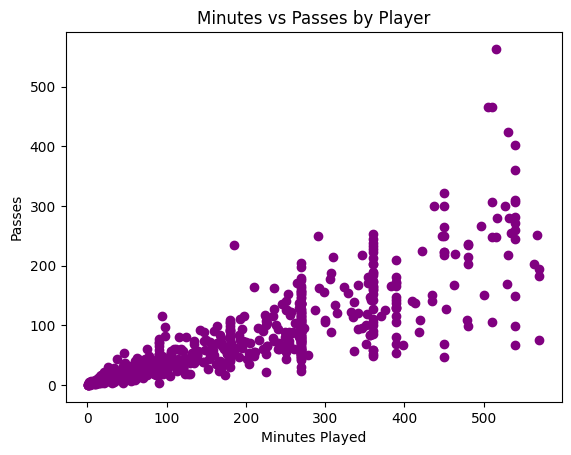

In [36]:
# Task 4: Scatter plot of passes vs minutes played
plt.scatter(players_df['minutes'], players_df['passes'], color='purple')
plt.title('Minutes vs Passes by Player')
plt.xlabel('Minutes Played')
plt.ylabel('Passes')
plt.show()

In [37]:
# Task 5: Map of countries based on goals made ("goalsFor")
# Aggregate the number of goals by each team
team_goals = players_df.groupby('team')['goalsFor'].sum().reset_index()

# Create a choropleth map using Plotly
fig = px.choropleth(team_goals,
                    locations='team',
                    locationmode='country names',
                    color='goalsFor',
                    hover_name='team',
                    color_continuous_scale='Blues',
                    title='Goals Scored by Country Teams')

# Show the plot
fig.show()


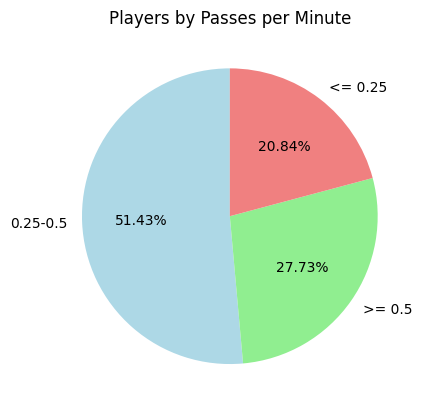

In [38]:
# Task 6: Pie chart showing relative percentage of players making passes per minute
passes_per_minute = players_df['passes'] / players_df['minutes']
bins = pd.cut(passes_per_minute, bins=[-1e-12, 0.25, 0.5-1e-12, passes_per_minute.max()], labels=['<= 0.25', '0.25-0.5', '>= 0.5'])
passes_distribution = bins.value_counts()
passes_distribution.plot(kind='pie', autopct='%1.2f%%', startangle=90, labels=passes_distribution.index, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Players by Passes per Minute')
plt.ylabel('')
plt.show()